In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
df = pd.read_csv('streaming_viewership_data.csv')

In [229]:
df.head()

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
0,eb4f9229-74df-45f6-baac-cf19241b8b30,cb2142a7-0750-49ed-b8ac-a975fe1ff69a,232,11,90.044525,Sci-Fi,Sudan,56,Female,Premium,3,Spanish,Smartphone,Reedshire,4K,73
1,661d4b59-4328-410a-901c-1e3b4c40c334,3bc0a662-b353-4015-8b0c-55ceb510d13a,549,85,68.973479,Comedy,Cuba,52,Male,Premium,3,Chinese,Desktop,Stevenhaven,SD,22
2,dd3fe9e9-ea82-4891-ab93-8a47c80e3251,bd545b4a-9f54-4e87-b9f8-15ae20b44f22,844,50,42.511343,Comedy,Japan,14,Female,Premium,3,Spanish,Tablet,Vaughntown,HD,41
3,a1b3365b-1d00-4ddf-bc43-02fc9c10c680,0441086d-c59e-478d-a496-5c5b995ecfdb,201,38,53.316660,Documentary,Lao People's Democratic Republic,36,Male,Premium,2,Spanish,Laptop,East Raymondbury,SD,40
4,338d3f91-5f1c-4590-8803-324901826406,0295f01d-7f15-4799-856c-90c688697ef8,700,31,69.437786,Action,Bangladesh,31,Male,Premium,4,German,Laptop,Michaelchester,HD,41


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     6214 non-null   object 
 1   Session_ID                  6214 non-null   object 
 2   Device_ID                   6214 non-null   int64  
 3   Video_ID                    6214 non-null   int64  
 4   Duration_Watched (minutes)  6214 non-null   float64
 5   Genre                       6214 non-null   object 
 6   Country                     6214 non-null   object 
 7   Age                         6214 non-null   int64  
 8   Gender                      6214 non-null   object 
 9   Subscription_Status         6214 non-null   object 
 10  Ratings                     6214 non-null   int64  
 11  Languages                   6214 non-null   object 
 12  Device_Type                 6214 non-null   object 
 13  Location                    6214 

Increible que no haya nulos, ciertas columnas solo molestan ya que no poseo las demas tablas con sus relaciones

In [231]:
df.drop(columns=['User_ID', 'Session_ID', 'Device_ID'])

,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
0,11,90.044525,Sci-Fi,Sudan,56,Female,Premium,3,Spanish,Smartphone,Reedshire,4K,73
1,85,68.973479,Comedy,Cuba,52,Male,Premium,3,Chinese,Desktop,Stevenhaven,SD,22
2,50,42.511343,Comedy,Japan,14,Female,Premium,3,Spanish,Tablet,Vaughntown,HD,41
3,38,53.316660,Documentary,Lao People's Democratic Republic,36,Male,Premium,2,Spanish,Laptop,East Raymondbury,SD,40
4,31,69.437786,Action,Bangladesh,31,Male,Premium,4,German,Laptop,Michaelchester,HD,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6209,44,21.113901,Thriller,Haiti,63,Male,Premium,3,French,Smart TV,East Robert,4K,2
6210,26,62.514391,Action,Malaysia,23,Male,Premium,4,German,Tablet,Walkerside,SD,87
6211,22,105.516389,Drama,Saint Martin,34,Male,Premium,5,English,Tablet,Jasonmouth,SD,54
6212,7,38.963612,Action,Poland,23,Female,Premium,5,English,Laptop,Lloydland,4K,37


In [232]:
df['Country'].unique() #:o

array(['Sudan', 'Cuba', 'Japan', "Lao People's Democratic Republic",
       'Bangladesh', 'Tokelau', 'Guyana', 'Guinea', 'Palau', 'Ecuador',
       'Iceland', 'Colombia', 'Dominican Republic', 'Georgia', 'Malaysia',
       'Togo', 'Iran', 'Estonia', 'Korea', 'Lebanon',
       'Trinidad and Tobago', 'Saint Vincent and the Grenadines',
       'Belarus', 'Northern Mariana Islands', 'Jersey', 'Niue', 'Lesotho',
       'Anguilla', 'Romania', 'Uganda', 'Comoros', 'Austria', 'Paraguay',
       'Angola', 'Philippines', 'Cambodia', 'Benin', 'Yemen',
       'Luxembourg', 'Malawi', 'Heard Island and McDonald Islands',
       'Wallis and Futuna', 'Macao', 'Honduras', 'Liechtenstein',
       'Uruguay', 'Cameroon', 'Cape Verde', 'San Marino', 'Guadeloupe',
       'Dominica', 'Egypt', 'Jamaica', 'Portugal', 'French Polynesia',
       'Gambia', 'Niger', 'Fiji', 'United States Virgin Islands', 'Aruba',
       'French Southern Territories', 'China', 'Sweden', "Cote d'Ivoire",
       'Saudi Arabia', 'Cro

Demasiada diversidad para un analisis particular sobre paises, usare solo los 15 con mayor recurrencia en el dataframe

In [233]:
df['Country'].value_counts()

Country
Congo                49
Wallis and Futuna    42
Korea                42
Solomon Islands      41
Uganda               39
                     ..
Rwanda               17
Colombia             17
Bolivia              17
Afghanistan          15
Gambia               14
Name: count, Length: 243, dtype: int64

In [234]:
paises_frecuentes = df['Country'].value_counts().nlargest(15).index

df_temporal = df[df['Country'].isin(paises_frecuentes)]

df_temporal

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
5,076b03f1-fd5b-4abe-b22e-cf3b4fdad381,ae95a7b7-6502-4da8-a6e5-9717b67c754a,514,83,41.810912,Comedy,Tokelau,53,Male,Premium,4,French,Laptop,Thomaston,SD,76
18,aa08b476-c42a-4323-8357-a027caaaaca2,0008a39c-329a-43a5-8de6-98e33e5326d9,360,37,27.726954,Comedy,Korea,62,Male,Premium,5,English,Tablet,Riveraview,SD,47
29,8b7c6411-841a-440e-9d83-0e27511bb2c5,b4af1bfa-5926-48fc-9cba-39a76e6a6847,591,29,101.671632,Comedy,Uganda,45,Female,Premium,3,Spanish,Laptop,South Robertbury,4K,26
43,e4487fa5-29eb-4b6a-89f9-72ae7a8a4b9e,00371bc7-d577-46cb-89b5-a44aa910eee5,157,93,10.788987,Thriller,Wallis and Futuna,17,Male,Free,2,English,Smartphone,Johnstonchester,SD,80
51,126c28c2-746a-4ee2-b313-83f62e30273c,270388b4-8387-4ea7-8413-b1bac30cd8a7,935,91,108.344495,Comedy,Korea,56,Male,Premium,4,Chinese,Tablet,East Raven,SD,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6178,18b1b9a3-3209-48bd-8baa-9afccd028253,1bf668d0-4011-4b2c-8c3e-a0bdd92264d7,363,52,54.559533,Documentary,Mongolia,27,Male,Premium,3,German,Laptop,New Scottfort,SD,60
6186,93c4b327-36c4-46ae-86bd-ae7847bf0fdc,67912a24-216d-4b58-9dde-4567a04b04b1,708,43,80.867258,Documentary,Korea,35,Female,Premium,2,French,Tablet,New Alejandroberg,SD,12
6189,dbc8415e-04d2-4833-9472-2316ef912cf0,29209ca6-7c4e-4572-ae4e-821e8ca1b2dd,264,54,119.926372,Drama,Korea,10,Male,Premium,4,Chinese,Tablet,Ortizbury,HD,20
6195,39ab9a1b-5417-4d61-83c3-509bb0090b0a,752dad35-723d-42a2-9518-e6f931a26838,693,22,68.641060,Sci-Fi,Korea,44,Female,Premium,3,German,Tablet,Coxtown,SD,46


c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


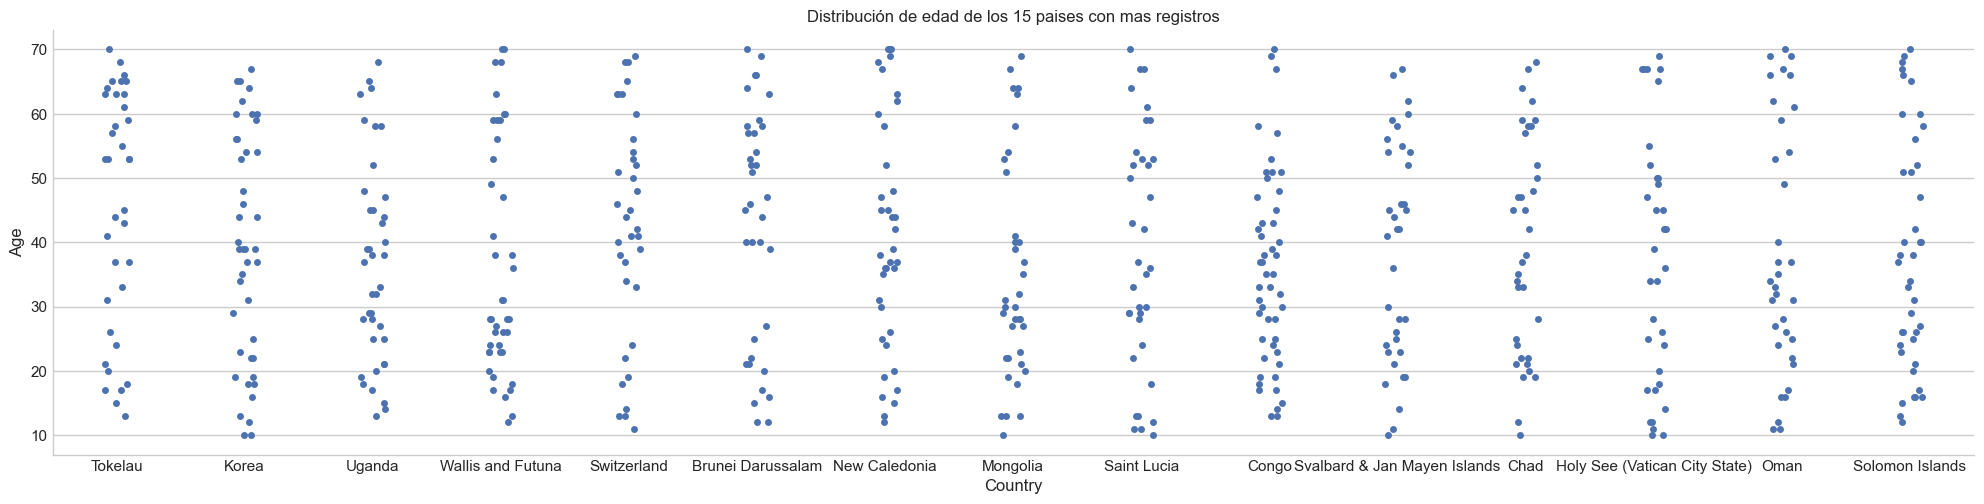

In [235]:
sns.set_style("whitegrid")
sns.catplot(x=df_temporal['Country'], y=df_temporal['Age'], aspect=4)
plt.title('Distribución de edad de los 15 paises con mas registros')
plt.show()

Increible variedad de edades y aun mas impresiona cuales son los paises con mas registros

C:\Users\RTECH\AppData\Local\Temp\ipykernel_19792\3253592623.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


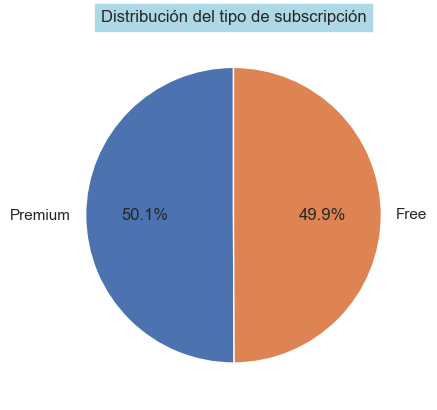

In [236]:
plt.style.use('seaborn-whitegrid')
plt.pie(df['Subscription_Status'].value_counts(), labels=df['Subscription_Status'].unique(), autopct='%1.1f%%', startangle=90)
plt.title('Distribución del tipo de subscripción', backgroundcolor='lightblue')
plt.show()

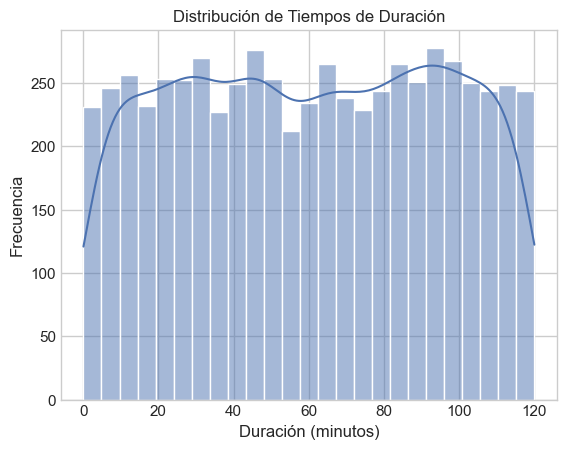

In [237]:
sns.histplot( x=df['Duration_Watched (minutes)'], bins=25, kde=True)
plt.title('Distribución de Tiempos de Duración')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()

Me resultan extraños aquellos valores bajos

In [255]:
df_vista = df.sort_values(by='Duration_Watched (minutes)', ascending=True)
df_vista.head() #Cuanto menos extraño

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events,genre_cat
2526,1fd72787-7129-472d-8c3a-d68d6f4b2cd8,a0d4c0d6-efa8-40fc-af01-59709817d631,825,11,0.055809,Documentary,Isle of Man,51,Male,Free,1,German,Smart TV,Harristown,SD,47,2
5222,5d9e46ca-4475-4a42-8d2d-57fd08bc88ce,351a5437-2604-48b3-bea3-fbe4fd5746a9,78,93,0.061911,Documentary,Malaysia,26,Female,Free,4,Spanish,Smart TV,Judithmouth,HD,86,2
3915,c1165e9a-1cfe-4b7b-884d-5f45bfebfa61,c0ab814c-ddde-4f97-96e7-073c615c08a9,182,24,0.072536,Action,Guam,42,Male,Premium,5,English,Laptop,Frankchester,4K,33,3
1335,b78231e5-31a7-494d-99aa-c0978fcff993,605acbac-89e0-465d-b845-e0c1d4394d84,178,87,0.080602,Comedy,Puerto Rico,39,Female,Premium,4,English,Tablet,Duncanborough,HD,43,1
4755,3706cfed-7895-4546-ad57-13974d05a63d,b5feaaa8-4731-43db-869a-a94b6ba74c45,641,47,0.092152,Comedy,Somalia,29,Male,Free,5,English,Laptop,Port Angela,HD,71,1


In [258]:
df_vista = df_vista[df_vista['Duration_Watched (minutes)'] > 15]
df_vista.head()

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events,genre_cat
5168,7f0e8fd7-ca6f-4d44-8393-666063b99dce,0da558a9-c225-47d2-bb95-d2d86ceea9db,972,69,15.013984,Action,Jordan,39,Female,Free,2,Chinese,Smart TV,South Lisa,SD,2,3
66,eaa0e7d4-f48c-4218-8918-998391c80e82,5e39e31a-142e-4156-9c3c-db97e7512921,593,68,15.024362,Thriller,Fiji,26,Female,Free,5,Spanish,Laptop,Port Daniel,HD,51,5
2322,f143c5e5-3816-4379-87b4-f7413e5f2546,c5ef6ed0-c248-42cf-aec4-4c2bd5f41339,528,19,15.074958,Comedy,Cocos (Keeling) Islands,48,Male,Free,5,French,Tablet,Lake Diana,SD,88,1
942,11f24891-3679-4d35-a8fc-39f9a5140905,65e7752e-87da-47ee-bba5-7ca6b362cb93,392,78,15.082039,Sci-Fi,Japan,20,Male,Free,1,German,Desktop,Nathanborough,HD,64,0
5665,a2e6f676-e8d8-492c-bc6a-d7b1649f6449,d463bbb9-014b-4350-bf39-8299ad2caece,146,21,15.096138,Comedy,Gibraltar,66,Female,Premium,2,Chinese,Desktop,South Rickytown,SD,21,1


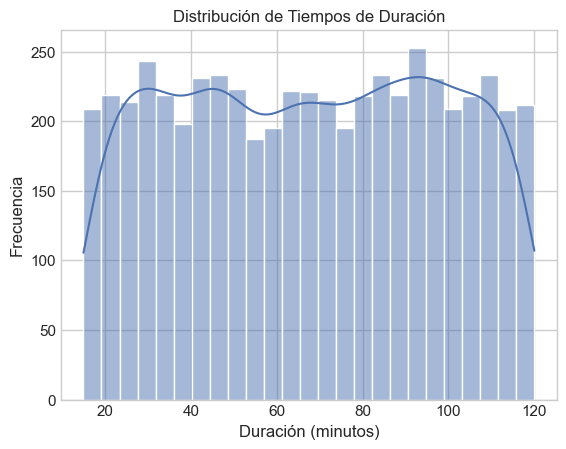

In [259]:
sns.histplot( x=df_vista['Duration_Watched (minutes)'], bins=25, kde=True)
plt.title('Distribución de Tiempos de Duración')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()

Este grafico me resulta mas acertado

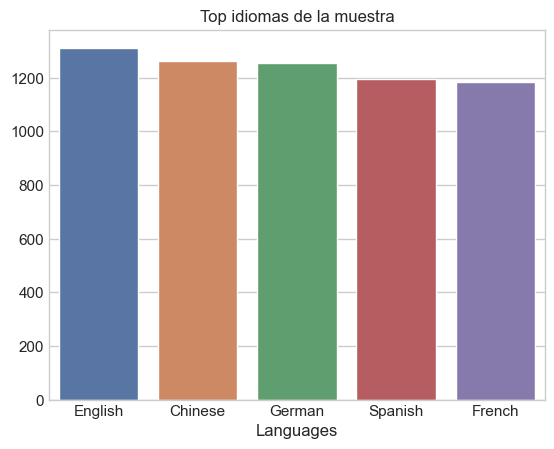

In [238]:
sns.barplot(x=df['Languages'].value_counts().index, y= df['Languages'].value_counts().values)
plt.title('Top idiomas de la muestra')
plt.show()

C:\Users\RTECH\AppData\Local\Temp\ipykernel_19792\4025399066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


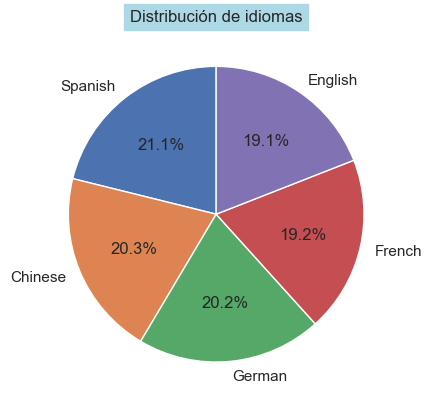

In [239]:
plt.style.use('seaborn-whitegrid')
plt.pie(df['Languages'].value_counts(), labels=df['Languages'].unique(), autopct='%1.1f%%', startangle=90)
plt.title('Distribución de idiomas', backgroundcolor='lightblue')
plt.show()

In [240]:
df['Genre'].value_counts()

Genre
Documentary    1065
Thriller       1050
Sci-Fi         1041
Comedy         1033
Action         1030
Drama           995
Name: count, dtype: int64

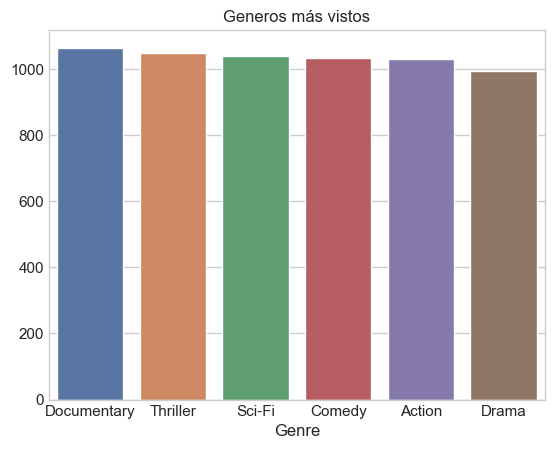

In [241]:
sns.barplot(x=df['Genre'].value_counts().index, y= df['Genre'].value_counts().values)
plt.title('Generos más vistos')
plt.show()

In [242]:
df['Device_Type'].value_counts()

Device_Type
Smart TV      1306
Desktop       1270
Smartphone    1233
Tablet        1217
Laptop        1188
Name: count, dtype: int64

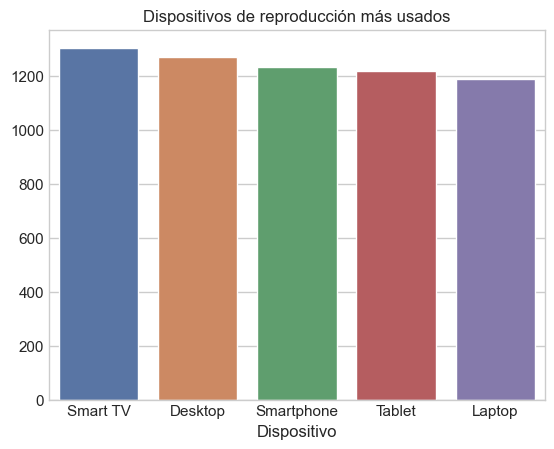

In [243]:
sns.barplot(x=df['Device_Type'].value_counts().index, y= df['Device_Type'].value_counts().values)
plt.title('Dispositivos de reproducción más usados')
plt.xlabel('Dispositivo')
plt.show()

In [244]:
df['Playback_Quality'].value_counts()

Playback_Quality
4K    2092
SD    2066
HD    2056
Name: count, dtype: int64

C:\Users\RTECH\AppData\Local\Temp\ipykernel_19792\664790639.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


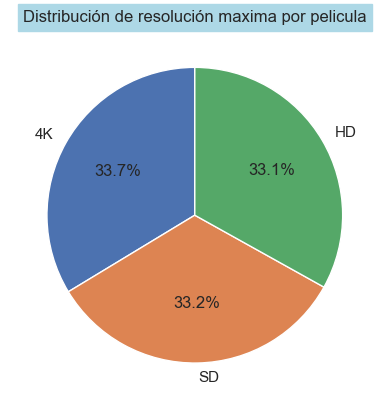

In [245]:
plt.style.use('seaborn-whitegrid')
plt.pie(df['Playback_Quality'].value_counts(), labels=df['Playback_Quality'].unique(), autopct='%1.1f%%', startangle=90)
plt.title('Distribución de resolución maxima por pelicula', backgroundcolor='lightblue')
plt.show()

In [246]:
df['genre_cat'] = pd.factorize(df['Genre'])[0]

In [247]:
df.head()

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events,genre_cat
0,eb4f9229-74df-45f6-baac-cf19241b8b30,cb2142a7-0750-49ed-b8ac-a975fe1ff69a,232,11,90.044525,Sci-Fi,Sudan,56,Female,Premium,3,Spanish,Smartphone,Reedshire,4K,73,0
1,661d4b59-4328-410a-901c-1e3b4c40c334,3bc0a662-b353-4015-8b0c-55ceb510d13a,549,85,68.973479,Comedy,Cuba,52,Male,Premium,3,Chinese,Desktop,Stevenhaven,SD,22,1
2,dd3fe9e9-ea82-4891-ab93-8a47c80e3251,bd545b4a-9f54-4e87-b9f8-15ae20b44f22,844,50,42.511343,Comedy,Japan,14,Female,Premium,3,Spanish,Tablet,Vaughntown,HD,41,1
3,a1b3365b-1d00-4ddf-bc43-02fc9c10c680,0441086d-c59e-478d-a496-5c5b995ecfdb,201,38,53.316660,Documentary,Lao People's Democratic Republic,36,Male,Premium,2,Spanish,Laptop,East Raymondbury,SD,40,2
4,338d3f91-5f1c-4590-8803-324901826406,0295f01d-7f15-4799-856c-90c688697ef8,700,31,69.437786,Action,Bangladesh,31,Male,Premium,4,German,Laptop,Michaelchester,HD,41,3


In [248]:
variable1 = df['genre_cat']
variable2= df['Age']

corr = variable1.corr(variable2)
corr

-0.022272158301542323

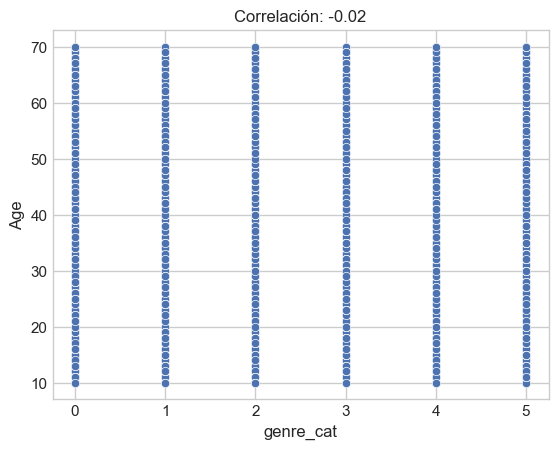

In [249]:
sns.scatterplot(x=variable1, y=variable2)
plt.title(f'Correlación: {corr:.2f}')
plt.show()

No hay correlacion alguna

In [250]:
variable1 = df['Ratings']
variable2= df['Interaction_Events']

corr = variable1.corr(variable2)
corr

-0.008162153175119959

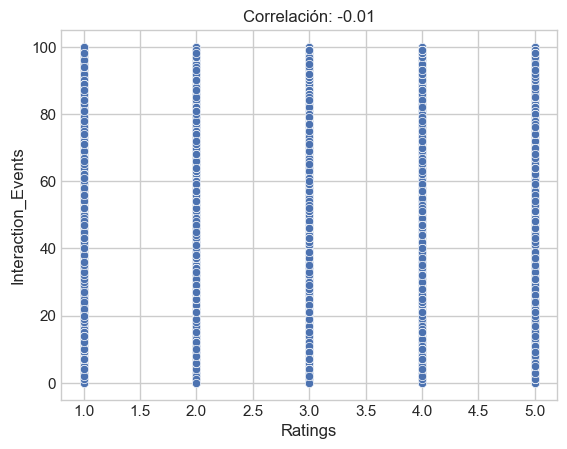

In [251]:
sns.scatterplot(x=variable1, y=variable2)
plt.title(f'Correlación: {corr:.2f}')
plt.show()

De nuevo no hay relación alguna

In [252]:
variable1 = df['Duration_Watched (minutes)']
variable2= df['Age']

corr = variable1.corr(variable2)
corr

0.0008451896690725139

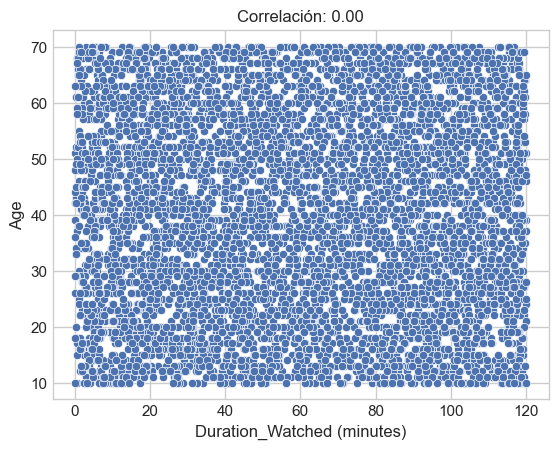

In [253]:
sns.scatterplot(x=variable1, y=variable2)
plt.title(f'Correlación: {corr:.2f}')
plt.show()

Wow, no hay más sospechas de posibles correlaciones